# UE02 - RDF and RDF Schema

Before you start with this notebook, complete the eight tasks in the `1. RDF` sheet of `SemAI.jar`. You will then make use of your solutions in this notebook. 

## Task 0: Preparation

Preparation (Installs and Imports). 




In [1]:


!pip install -q rdflib 
!pip install -q pydot
!pip install -q owlrl

!pip install networkx pyvis

import rdflib
from rdflib import Graph, Literal, RDF, URIRef, BNode, Namespace, Dataset
import networkx as nx
from pyvis.network import Network
import requests
from IPython.display import display, HTML, Image
import os
import pydot
import owlrl
from rdflib.namespace import FOAF , XSD , RDFS 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 951.2 kB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.5 MB/s eta 0:00:00


## Task 1:  Improve interactive RDF graph visualization (1 pt)

Improve function `visualize_graph_pyvis` (from `V01_rdf.ipynb`) as follows:
- an optional `base` parameter
- abbreviate the labels of nodes and edges in the same way as in `visualize_graph`. 
- make sure that blank node IDs are not shown in the visualization. 

Optional features: 
- use different graphical forms for literals and URIs
- (add further improvements as you like)

Test the function with `rdf_str` and with your solution to task `0. Intro` in the `1. RDF` sheet in `SemAI.jar`.

In [ ]:
rdf_str = """BASE   <http://example.org/>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX schema: <http://schema.org/>
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX wd: <http://www.wikidata.org/entity/>
 
<bob#me>
   a foaf:Person ;
   foaf:knows <alice#me> ;
   schema:birthDate "1990-07-04"^^xsd:date ;
   foaf:topic_interest wd:Q12418 .
   
wd:Q12418
  dcterms:title "Mona Lisa" ;
  dcterms:creator <http://dbpedia.org/resource/Leonardo_da_Vinci> .

<http://data.europeana.eu/item/04802/243FA8618938F4117025F17A8B813C5F9AA4D619>
  dcterms:subject wd:Q12418 .
"""




## Task 2:  Print RDF graph as HTML table (1 pt)

Implement a function `rdf2htmltable(g)` that 
- takes as parameter an rdflib.Graph 
- generates and displays an HTML table representing that graph with
  - one line per RDF statement 
  - three columns (subject, predicate, object) 
  - URIs should be shown in abbreviated form and be represented as links (`href=<full URI>`)

Test the function with `rdf_str` and with your solution to task `0. Intro` in the `1. RDF` sheet in `SemAI.jar`.

In [46]:
def rdf2htmltable(g):

    triples = g.triples((None, None, None))
    ns_manager = g.namespace_manager

    html_table = '<table>'
    html_table += """
      <tr>
        <th>Subject</th>
        <th>Predicate</th>
        <th>Object</th>
      </tr>
    """
    for s, p, o in triples:
      try:
        short_s = ns_manager.qname(s)
      except:
        short_s = str(s)
      try:
        short_p = ns_manager.qname(p)
      except:
        short_p = str(p)
      try:
        short_o = ns_manager.qname(o)
      except:
        short_o = str(o)
       
      html_table += '<tr>'
      html_table += f'<td><a href="{str(s)}">{short_s}</a></td>'
      html_table += f'<td><a href="{str(p)}">{short_p}</a></td>'
      html_table += f'<td><a href="{str(o)}">{short_o}</a></td>'
      html_table += '</tr>'

    html_table += '</table>'

    display(HTML(html_table))
    

g = Graph()
g.parse(format="turtle",data="""
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ex:   <http://www.ex.org/> .

ex:John a foaf:Person ;
foaf:knows ex:Mary .
""")
rdf2htmltable(g)


Subject,Predicate,Object
ex:John,foaf:knows,ex:Mary
ex:John,rdf:type,foaf:Person


## Task 3: A function for parsing and displaying an RDF graph (1 pt)

A function `parse_display_rdf(str)` that takes as parameter a string which represents an RDF graph in Turtle notation and 
- produces an rdflib.Graph from that string
- prints the graph in Turte notation
- prints the graph in RDF/XML
- visualizes it using `visualize_graph` (to be taken from `V01_rdf.ipynb`)
- visualizes it using (your improved version of) `visualize_graph_pyvis`
- outputs it using `rdf2htmltable` (only if you have implemented this function)

Test the function with `rdf_str` and with your solution to task `0. Intro` in the `1. RDF` sheet in `SemAI.jar`.

@base <http://example.org/> .
@prefix ex: <http://www.ex.org/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .

ex:John a foaf:Person ;
    foaf:knows ex:Mary .


<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xml:base="http://example.org/"
   xmlns:foaf="http://xmlns.com/foaf/0.1/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.ex.org/John">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <foaf:knows rdf:resource="http://www.ex.org/Mary"/>
  </rdf:Description>
</rdf:RDF>



Subject,Predicate,Object
ex:John,foaf:knows,ex:Mary
ex:John,rdf:type,foaf:Person


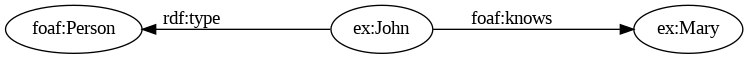

In [47]:
def visualize_graph(g,base=None):

  def node_id(graph,term):
    if isinstance(term,Literal): return term.n3(graph.namespace_manager)
    else: return f"\"{term.n3(graph.namespace_manager)}\""

  def add_node(dg,g,t,base):
    if isinstance(t,URIRef):
      lbl = f"\"{t.n3(g.namespace_manager)}\""
      if(base): lbl = lbl.replace(base,"")
      if(len(lbl)>25): lbl = lbl[:12] + "..." +  lbl[-12:] 
      dg.add_node(pydot.Node( node_id(g,t), label=lbl ))
    if isinstance(t,Literal):
      dg.add_node(pydot.Node( node_id(g,t), label=t.n3(g.namespace_manager), shape="box"))
    if isinstance(t,BNode):
      dg.add_node(pydot.Node( node_id(g,t), label=""))    

  def add_edge(dg,g,s,p,o):
    dg.add_edge(pydot.Edge(node_id(g,s), node_id(g,o), label=f"\"{p.n3(g.namespace_manager)}\""))

  dg = pydot.Dot('my_graph', graph_type='digraph',layout='sfdp', splines='curved' )

  for subj in g.subjects(None,None): add_node(dg,g,subj,base)
  for obj in g.objects(None,None): add_node(dg,g,obj,base)
  for (s,p,o) in g: add_edge(dg,g,s,p,o)   

  display(Image(dg.create_png()))

def parse_display_rdf(str):
  g = Graph()
  g.parse(format="turtle",data=str)
  print(g.serialize(format="turtle",base="http://example.org/"))
  print(g.serialize(format="xml",base="http://example.org/"))
  rdf2htmltable(g)
  visualize_graph(g, base="http://example.org/")

parse_display_rdf("""
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ex:   <http://www.ex.org/> .

ex:John a foaf:Person ;
foaf:knows ex:Mary .
""")


# Tasks 4-10 (1 point each)

For each of the remaining 7 tasks in the "1. RDF" sheet in `SemAI.jar` do the following: 
- add a text cell in this notebook 
  - with the description of the task from `SemAI.jar` 
  - with number and title (e.g., **1. Simple Data Graph**)  from `SemAI.jar` as header 
- add a code cell where you apply `parse_display_rdf(str)` on your solution

# 1. Simple Data Graph

Create an RDF graph in Turtle notation. Use the FOAF vocabulary to state the following.

Mary and Jim are persons.
Mary knows Jim.
Mary is 27 years old.
The URIs for the two persons should be http://www.ex.org/person#Mary and http://www.ex.org/person#Jim. The age of Mary should be represented as an integer.

@base <http://example.org/> .
@prefix : <http://www.ex.org/person#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

:Mary a foaf:Person ;
    foaf:age 27 ;
    foaf:knows :Jim .

:Jim a foaf:Person .


<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xml:base="http://example.org/"
   xmlns:foaf="http://xmlns.com/foaf/0.1/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.ex.org/person#Mary">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <foaf:knows rdf:resource="http://www.ex.org/person#Jim"/>
    <foaf:age rdf:datatype="http://www.w3.org/2001/XMLSchema#integer">27</foaf:age>
  </rdf:Description>
  <rdf:Description rdf:about="http://www.ex.org/person#Jim">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
  </rdf:Description>
</rdf:RDF>



Subject,Predicate,Object
Mary,rdf:type,foaf:Person
Jim,rdf:type,foaf:Person
Mary,foaf:knows,Jim
Mary,foaf:age,27


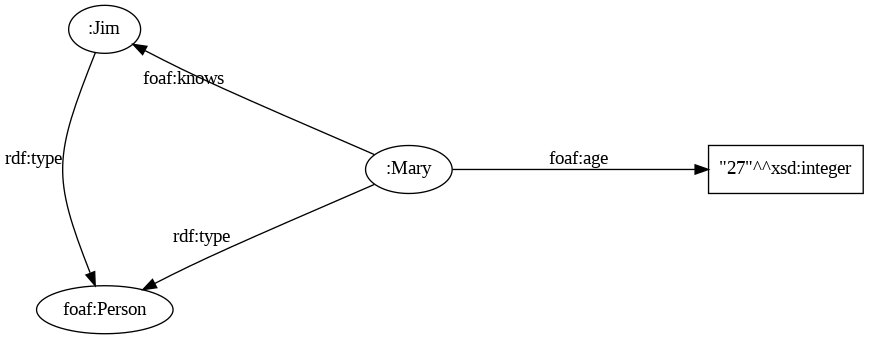

In [48]:
parse_display_rdf("""
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix :     <http://www.ex.org/person#> .

:Mary rdf:type foaf:Person ;
foaf:knows :Jim ;
foaf:age 27 .

:Jim a foaf:Person .
""")

# 2. Simple Schema

Create a vocabulary using RDFS in Turtle. Specify

Classes Company, Employee, and Person
Property worksFor between Employee and Company
Property salary of Employee with Integer as data type
Class Employee is a subclass of Person
Use XSD for data types. The URIs of classes and properties are in namespace <http://www.ex.org/vocabulary#>, for example, <http://www.ex.org/vocabulary#Company>


@base <http://example.org/> .
@prefix : <http://www.ex.org/vocabulary#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

:Company a rdfs:Class .

:Employee a rdfs:Class ;
    rdfs:subClassOf :Person .

:Person a rdfs:Class .

:salary a rdf:Property ;
    rdfs:domain :Employee ;
    rdfs:range xsd:integer .

:worksFor a rdf:Property ;
    rdfs:domain :Employee ;
    rdfs:range :Company .


<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xml:base="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
>
  <rdf:Description rdf:about="http://www.ex.org/vocabulary#Person">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://www.ex.org/vocabulary#Company">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf

Subject,Predicate,Object
Person,rdf:type,rdfs:Class
Company,rdf:type,rdfs:Class
worksFor,rdf:type,rdf:Property
worksFor,rdfs:domain,Employee
Employee,rdf:type,rdfs:Class
salary,rdfs:range,xsd:integer
salary,rdf:type,rdf:Property
Employee,rdfs:subClassOf,Person
worksFor,rdfs:range,Company
salary,rdfs:domain,Employee


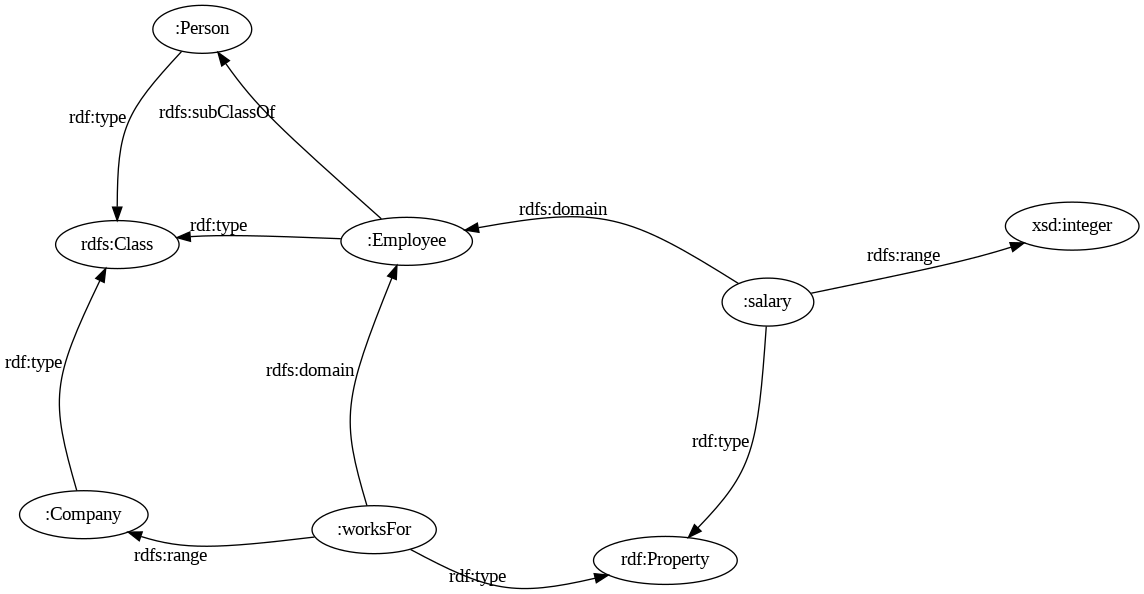

In [49]:
parse_display_rdf("""
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd:  <http://www.w3.org/2001/XMLSchema#> .
@prefix :     <http://www.ex.org/vocabulary#> .

:Company a rdfs:Class .

:Employee a rdfs:Class ;
  rdfs:subClassOf :Person .

:Person a rdfs:Class .

:worksFor a rdf:Property ;
rdfs:range :Company ;
rdfs:domain :Employee .

:salary a rdf:Property ;
rdfs:domain :Employee ;
rdfs:range xsd:integer .
""")

# 3. Reification

Create an RDF graph in Turtle notation. Use the RDF vocabulary where applicable and the example namesspace (ex:) for all other resources (ex:Mary, ex:John, ex:says, ex:loves). Hint: the lecture slides contain a similar reification example.

Mary says that John loves her.

@base <http://example.org/> .
@prefix ex: <http://www.ex.org/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

ex:Mary ex:says ex:Statement .

ex:Statement a rdf:Statement ;
    rdf:object ex:Mary ;
    rdf:predicate ex:loves ;
    rdf:subject ex:John .


<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xml:base="http://example.org/"
   xmlns:ex="http://www.ex.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.ex.org/Statement">
    <rdf:type rdf:resource="http://www.w3.org/1999/02/22-rdf-syntax-ns#Statement"/>
    <rdf:object rdf:resource="http://www.ex.org/Mary"/>
    <rdf:subject rdf:resource="http://www.ex.org/John"/>
    <rdf:predicate rdf:resource="http://www.ex.org/loves"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://www.ex.org/Mary">
    <ex:says rdf:resource="http://www.ex.org/Statement"/>
  </rdf:Description>
</rdf:RDF>



Subject,Predicate,Object
ex:Statement,rdf:predicate,ex:loves
ex:Statement,rdf:object,ex:Mary
ex:Statement,rdf:subject,ex:John
ex:Mary,ex:says,ex:Statement
ex:Statement,rdf:type,rdf:Statement


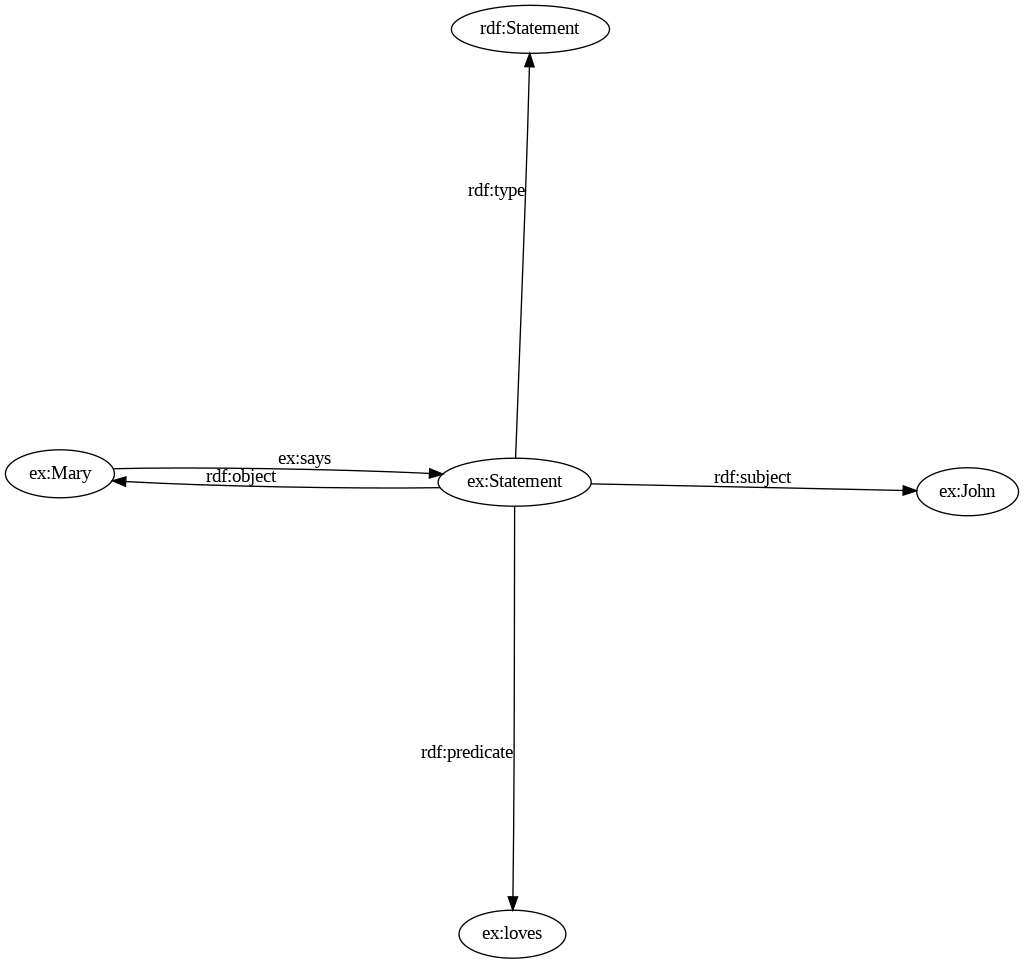

In [50]:
parse_display_rdf("""
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix ex:   <http://www.ex.org/> .

ex:Statement rdf:type rdf:Statement ;
rdf:object ex:Mary ;
rdf:subject ex:John ;
rdf:predicate ex:loves .

ex:Mary ex:says ex:Statement .
""")

# 4. Blank Node

Create an RDF graph in Turtle notation. Use the RDF and FOAF vocabularies where applicable and the example namesspace (ex:) for the other resources.

John knows a person, who knows Mary.
Use a blank node to represent that anonymous person.

@base <http://example.org/> .
@prefix ex: <http://www.ex.org/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .

ex:John foaf:knows [ a foaf:Person ;
            foaf:knows ex:Mary ] .


<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xml:base="http://example.org/"
   xmlns:foaf="http://xmlns.com/foaf/0.1/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:nodeID="n4a14e3b5c0484ab09be0650a8d367eeeb1">
    <rdf:type rdf:resource="http://xmlns.com/foaf/0.1/Person"/>
    <foaf:knows rdf:resource="http://www.ex.org/Mary"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://www.ex.org/John">
    <foaf:knows rdf:nodeID="n4a14e3b5c0484ab09be0650a8d367eeeb1"/>
  </rdf:Description>
</rdf:RDF>



Subject,Predicate,Object
n4a14e3b5c0484ab09be0650a8d367eeeb1,rdf:type,foaf:Person
n4a14e3b5c0484ab09be0650a8d367eeeb1,foaf:knows,ex:Mary
ex:John,foaf:knows,n4a14e3b5c0484ab09be0650a8d367eeeb1


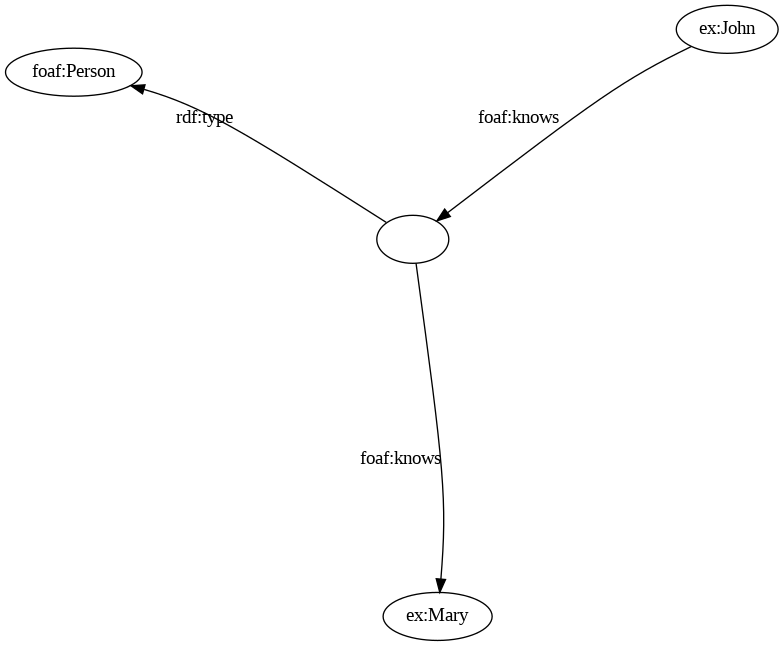

In [51]:
parse_display_rdf("""
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix ex:   <http://www.ex.org/> .

ex:John foaf:knows _:1 .

_:1 a foaf:Person ;
foaf:knows ex:Mary .
""")

# 5. Multiple Classification
Create an RDF graph in Turtle notation. Use the RDF vocabulary where applicable and the example namesspace (ex:) for the other resources.

John is an instance of SoccerPlayer and of Student.

@base <http://example.org/> .
@prefix ex: <http://www.ex.org/> .

ex:John a ex:SoccerPlayer,
        ex:Student .


<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xml:base="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://www.ex.org/John">
    <rdf:type rdf:resource="http://www.ex.org/SoccerPlayer"/>
    <rdf:type rdf:resource="http://www.ex.org/Student"/>
  </rdf:Description>
</rdf:RDF>



Subject,Predicate,Object
ex:John,rdf:type,ex:SoccerPlayer
ex:John,rdf:type,ex:Student


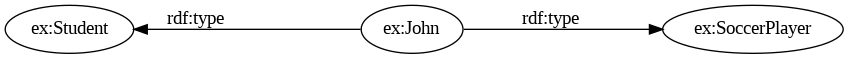

In [52]:
parse_display_rdf("""
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix ex:   <http://www.ex.org/> .

ex:John a ex:SoccerPlayer ;
a ex:Student .
""")

# 6. Metamodeling

Create an RDF graph in Turtle notation. Use the RDF and RDF Schema vocabularies where applicable and the example namesspace (ex:) for the other resources.

Dog and Cat are instances of Species and subclasses of Animal.
Lassie is an instance of Dog.

@base <http://example.org/> .
@prefix ex: <http://www.ex.org/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:Cat a ex:Species ;
    rdfs:subClassOf ex:Animal .

ex:Lassie a ex:Dog .

ex:Dog a ex:Species ;
    rdfs:subClassOf ex:Animal .


<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xml:base="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
>
  <rdf:Description rdf:about="http://www.ex.org/Cat">
    <rdf:type rdf:resource="http://www.ex.org/Species"/>
    <rdfs:subClassOf rdf:resource="http://www.ex.org/Animal"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://www.ex.org/Dog">
    <rdf:type rdf:resource="http://www.ex.org/Species"/>
    <rdfs:subClassOf rdf:resource="http://www.ex.org/Animal"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://www.ex.org/Lassie">
    <rdf:type rdf:resource="http://www.ex.org/Dog"/>
  </rdf:Description>
</rdf:RDF>



Subject,Predicate,Object
ex:Cat,rdfs:subClassOf,ex:Animal
ex:Dog,rdfs:subClassOf,ex:Animal
ex:Dog,rdf:type,ex:Species
ex:Cat,rdf:type,ex:Species
ex:Lassie,rdf:type,ex:Dog


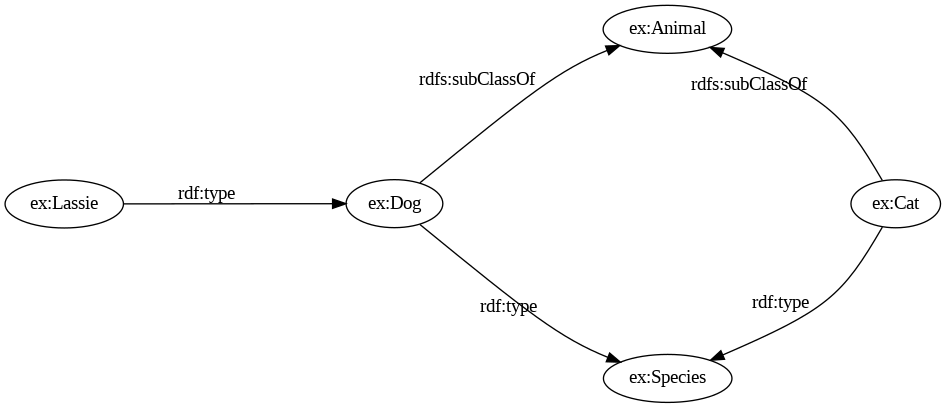

In [53]:
parse_display_rdf("""
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex:   <http://www.ex.org/> .

ex:Dog a ex:Species ;
rdfs:subClassOf ex:Animal .

ex:Cat a ex:Species ;
rdfs:subClassOf ex:Animal .

ex:Lassie a ex:Dog .
""")

# 7. Properties

Create an RDF graph in Turtle notation. Use the RDF and RDF Schema vocabularies where applicable and the example namesspace (ex:) for the other resources, e.g., ex:childOf, ex:descendantOf.

Everyone who is a child of someone, is also a descendant of that someone.

@base <http://example.org/> .
@prefix ex: <http://www.ex.org/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:childOf rdfs:subPropertyOf ex:descendantOf .


<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xml:base="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
>
  <rdf:Description rdf:about="http://www.ex.org/childOf">
    <rdfs:subPropertyOf rdf:resource="http://www.ex.org/descendantOf"/>
  </rdf:Description>
</rdf:RDF>



Subject,Predicate,Object
ex:childOf,rdfs:subPropertyOf,ex:descendantOf


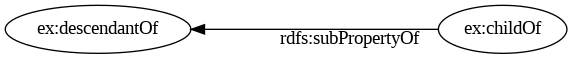

In [54]:
parse_display_rdf("""
@prefix rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix ex:   <http://www.ex.org/> .

ex:childOf rdfs:subPropertyOf ex:descendantOf .
""")